***` A/B Testing. Advertising effectiveness`***

The purpose of this analysis is to check whether sales results can be attributed to advertising. Or there is reason to believe that it is not advertising, but other factors that influence the success/failure of the campaign. Do the conversion rates of the group to which the ad was shown differ significantly from those of the other (control) group?

What data is contained in the table?

1.   User ID
2.   Test group. We have data on two groups of people - who were shown ads (ad) and who were shown just a public announcement (psa).
3. Converted. True or False - whether the participant of the experiment purchased the product or not. The conversion percentage can be calculated for each group.
4. Total ads. How many times has a person seen an ad/advertisement.
5. Most ads day. On which day did the person see the largest number of ads/ads.
6. Most ads hour. At what hour did the person see the largest number of ads/ads.



Plan:
*   Import libraries and files.
*   Viewing and cleaning data.
*   Research data analysis. Evaluation of the quality of the data for the test.
*   Test
*   Evaluation of the test. Power. Practical significance.
*   Visualization
*   Conclusion









# Data Import

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from statsmodels.stats import power
from statsmodels.stats.proportion import proportions_ztest
sns.set()

In [8]:
df = pd.read_csv("/content/drive/MyDrive/A B Test Marketing/marketing_AB.csv")
df.head()

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


# Data Cleaning

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588101 entries, 0 to 588100
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Unnamed: 0     588101 non-null  int64 
 1   user id        588101 non-null  int64 
 2   test group     588101 non-null  object
 3   converted      588101 non-null  bool  
 4   total ads      588101 non-null  int64 
 5   most ads day   588101 non-null  object
 6   most ads hour  588101 non-null  int64 
dtypes: bool(1), int64(4), object(2)
memory usage: 27.5+ MB


In [13]:
df = df.drop(columns = ['Unnamed: 0'])

In [15]:
df.columns = df.columns.str.replace(' ', '_')
df.head()

,user_id,test_group,converted,total_ads,most_ads_day,most_ads_hour
0,1069124,ad,False,130,Monday,20
1,1119715,ad,False,93,Tuesday,22
2,1144181,ad,False,21,Tuesday,18
3,1435133,ad,False,355,Tuesday,10
4,1015700,ad,False,276,Friday,14


In [17]:
df.duplicated().sum()

0

In [18]:
df.isna().sum()

user_id          0
test_group       0
converted        0
total_ads        0
most_ads_day     0
most_ads_hour    0
dtype: int64

In [19]:
df.total_ads.describe()

count    588101.000000
mean         24.820876
std          43.715181
min           1.000000
25%           4.000000
50%          13.000000
75%          27.000000
max        2065.000000
Name: total_ads, dtype: float64

Text(0.5, 1.0, 'Distribution of ADS')

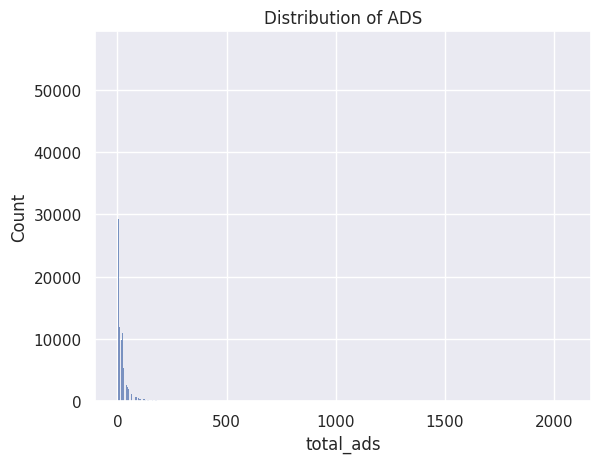

In [23]:
sns.histplot(df.total_ads)
plt.title('Distribution of ADS')

In [24]:
df[df.total_ads > df.total_ads.quantile(q = 0.99)]. groupby('test_group')['total_ads'].agg(['mean', min, max])

,mean,min,max
test_group,,,
ad,327.390288,203,2065
psa,306.180000,203,907


In [25]:
df2 = df[df.total_ads < df.total_ads.quantile(q = 0.99)]
df2.total_ads.describe()

count    582216.000000
mean         21.787785
std          28.035705
min           1.000000
25%           4.000000
50%          13.000000
75%          27.000000
max         201.000000
Name: total_ads, dtype: float64

Text(0.5, 1.0, 'Distribution of ADS')

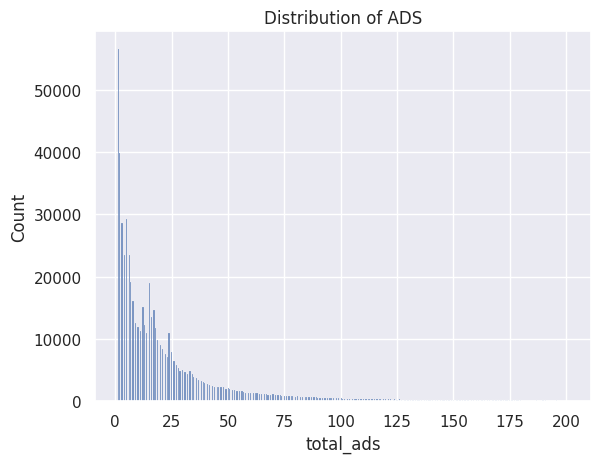

In [27]:
sns.histplot(df2.total_ads)
plt.title('Distribution of ADS')

In [28]:
df2.head()

,user_id,test_group,converted,total_ads,most_ads_day,most_ads_hour
0,1069124,ad,False,130,Monday,20
1,1119715,ad,False,93,Tuesday,22
2,1144181,ad,False,21,Tuesday,18
7,1496843,ad,False,17,Sunday,18
8,1448851,ad,False,21,Tuesday,19


In [30]:
for col in ['test_group', 'converted', 'total_ads', 'most_ads_day', 'most_ads_hour']:
  print(col, 'distribution')
  print(df2[col].value_counts())
  print()

test_group distribution
ad     558946
psa     23270
Name: test_group, dtype: int64

converted distribution
False    568292
True      13924
Name: converted, dtype: int64

total_ads distribution
1      56606
2      39827
5      29303
3      28661
4      23426
       ...  
198       65
195       61
199       60
185       56
200       49
Name: total_ads, Length: 201, dtype: int64

most_ads_day distribution
Friday       91396
Monday       86035
Sunday       84706
Thursday     82185
Saturday     80924
Wednesday    80089
Tuesday      76881
Name: most_ads_day, dtype: int64

most_ads_hour distribution
13    47164
12    46729
11    45691
14    45226
15    44168
10    38492
16    37334
17    34675
18    31963
9     30728
19    30010
21    29681
20    28609
22    26264
23    20099
8     17441
7      6290
0      5491
2      5284
1      4764
3      2662
6      2001
5       737
4       713
Name: most_ads_hour, dtype: int64



# EDA

In [32]:
df2.converted.value_counts(normalize = True)

False    0.976084
True     0.023916
Name: converted, dtype: float64

conversion rate = 2.39%

In [34]:
# conversion rate by groups
df2.groupby('test_group')['converted'].mean()

test_group
ad     0.024231
psa    0.016330
Name: converted, dtype: float64

Text(0, 0.5, 'Conversion rate')

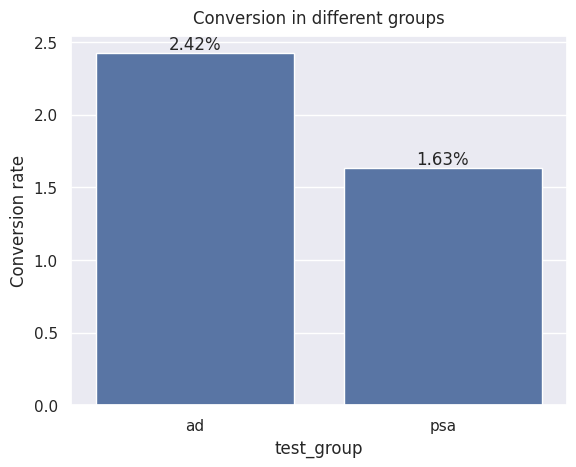

In [35]:
ax = sns.barplot(x = df2.groupby('test_group')['converted'].mean().index,
                 y = df2.groupby('test_group')['converted'].mean() * 100)
rects = ax.patches
labels = [str(i) + '%' for i in round(df2.groupby('test_group')['converted'].mean() * 100,2)]

for rect, label in zip(rects,labels):
  height = rect.get_height()
  ax.text(
      rect.get_x() + rect.get_width() / 2, height, label, ha ="center", va="bottom"
  )
plt.title('Conversion in different groups', va="bottom")
plt.ylabel('Conversion rate')

In [39]:
test = df2.test_group == 'ad'
control = df2.test_group == 'psa'

n_control = len(df2[control])
n_test = len(df2[test])
p_control = round(df2[control]['converted'].mean(), 4)
p_test = round(df2[test]['converted'].mean(), 4)
print("Control group count - ", n_control)
print("Test group count - ", n_test)
print("Proportion (conversion) of control group - ", p_control)
print("Proportion (conversion) of test group - ", p_test)

Control group count -  23270
Test group count -  558946
Proportion (conversion) of control group -  0.0163
Proportion (conversion) of test group -  0.0242


In [43]:
from statsmodels.stats.proportion import proportion_effectsize
effect_size = proportion_effectsize(p_control, p_test)
delta_p = p_test - p_control
print('Absolute difference in proportion:', abs(round((delta_p)*100,2)), '%')
print('Effect size:', abs(round(effect_size,2)))

if effect_size > 0.8:
  print('Size effect is high')
elif effect_size > 0.5:
  print('Size effect is medium')
elif effect_size > 0.2:
  print('Size effect is low')
else:
  print('Size effect is negligible')

Absolute difference in proportion: 0.79 %
Effect size: 0.06
Size effect is negligible


In [44]:
df2.groupby('test_group')['total_ads'].mean()

test_group
ad     21.791137
psa    21.707263
Name: total_ads, dtype: float64

<Axes: xlabel='total_ads', ylabel='test_group'>

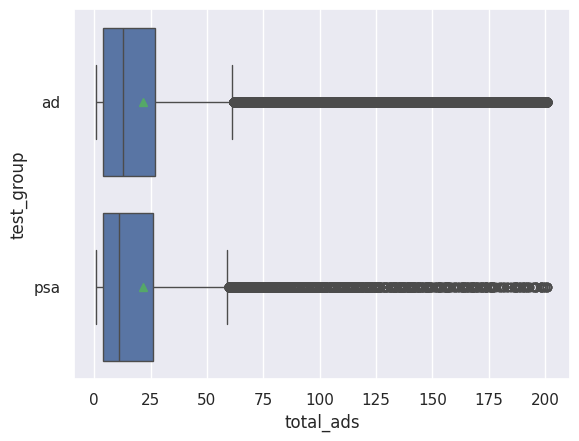

In [45]:
sns.boxplot(data = df2, y = 'test_group', x = 'total_ads', showmeans = True)

In [46]:
round(pd.crosstab(df.test_group, df.most_ads_day, normalize = 'index') * 100, 2)

most_ads_day,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
test_group,,,,,,,
ad,15.73,14.80,13.96,14.58,14.01,13.21,13.71
psa,16.17,14.89,12.15,13.00,16.60,12.36,14.84


In [47]:
round(pd.crosstab(df.test_group, df.most_ads_hour, normalize = 'index') * 100, 2)

most_ads_hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
test_group,,,,,,,,,,,,,,,,,,,,,
ad,0.94,0.82,0.91,0.46,0.12,0.13,0.35,1.09,3.01,5.28,...,7.75,7.59,6.37,5.95,5.5,5.17,4.93,5.12,4.52,3.46
psa,0.96,0.79,0.77,0.38,0.12,0.10,0.35,1.01,2.80,5.11,...,7.95,7.77,6.82,5.88,5.4,5.03,4.58,4.60,3.90,2.63


# Test

In [48]:
cond1 = (n_control) * p_control > 10
cond2 = (n_control) * (1 - p_control) > 10
cond3 = (n_test) * p_test > 10
cond4 = (n_test) * (1 - p_test) > 10

if cond1 & cond2 & cond3 & cond4:
  print('We can approximate our binominal distribution')
else:
  print('We can not approximate our binominal distribution')

We can approximate our binominal distribution


In [49]:
df2.test_group.value_counts()

ad     558946
psa     23270
Name: test_group, dtype: int64

In [50]:
alpha = 0.05
beta = 0.2

sample_size = power.TTestIndPower().solve_power(effect_size = effect_size, alpha = alpha, power = 1-beta, nobs1 = None)
print(round(sample_size))

4944


In [51]:
test = df2[df2.test_group == 'ad']['converted'].sum()
control = df2[df2.test_group == 'psa']['converted'].sum()

z_stat, p_value = proportions_ztest([control, test], nobs = [n_control, n_test], alternative = 'two-sided')
print('z =', z_stat)
print('p-value =', p_value)

z = -7.729563914889429
p-value = 1.0791561749201039e-14


In [53]:
ratio = n_test/n_control

test_power = power.TTestIndPower().solve_power(effect_size = effect_size, alpha = 0.05,
                                               power = None, nobs1 = n_control, ratio = ratio)
print(round(test_power))

1


In [56]:
p_pooled = round((n_control * p_control + n_test * p_test)/(n_control + n_test),3)
se = round(np.sqrt(p_pooled*(1 - p_pooled) * (1/n_control + 1/n_test)),3)
mu_delta = 0
cutoff_left = round(norm.ppf(alpha/2, loc=mu_delta, scale=se),3)
cutoff_right = round(norm.ppf(1 - alpha/2, loc=mu_delta, scale=se),3)
delta = p_test - p_control

print('Total combined share =', p_pooled)
print('Common combined standard error =', se)
print('Critical values = ', cutoff_left, 'and', cutoff_right)
print('Observed difference =', delta)

Total combined share = 0.024
Common combined standard error = 0.001
Critical values =  -0.002 and 0.002
Observed difference = 0.0079


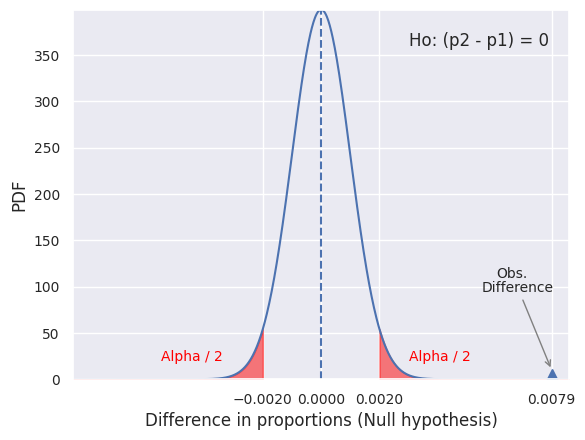

In [57]:
# Distribution Graph
fig, ax = plt.subplots()


x = np.linspace( mu_delta - 8.5*se, mu_delta + 8.5*se, 1000)
y = norm.pdf(x, loc=mu_delta, scale= se)
sns.lineplot(x=x, y=y, ax=ax)

#mu delta
ax.axvline(mu_delta, linestyle='--')

#x ticks
plt.xticks([delta, cutoff_left, mu_delta, cutoff_right])
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.plot(delta, 0, "b^", markersize=15)
plt.text(0.0060, 110, 'Obs.', fontsize=10)
plt.annotate("Difference", xy=(0.0079, 10), xytext=(0.0055, 95),
            arrowprops={"arrowstyle":"->", "color":"gray"},
             fontsize=10)

#alpha
alpha_x = np.linspace(cutoff_right, mu_delta + 8.5 * se, 1000)
alpha_y = norm.pdf(alpha_x, loc = mu_delta, scale= se)
plt.fill_between(alpha_x, alpha_y, color='red', alpha=0.5)

alpha_x2 = np.linspace(mu_delta - 8.5 * se, cutoff_left, 1000)
alpha_y2 = norm.pdf(alpha_x2, loc = mu_delta, scale= se)
plt.fill_between(alpha_x2, alpha_y2, color='red', alpha=0.5)

plt.text(-0.0055, 20, 'Alpha / 2', color='red', fontsize=10)
plt.text(0.003, 20, 'Alpha / 2', color='red', fontsize=10)

#H null
plt.text(0.003, 360, 'Ho: (p2 - p1) = 0')

#labels
plt.xlabel('Difference in proportions (Null hypothesis)')
plt.ylabel('PDF')

plt.autoscale(enable=True, axis='both', tight=True)

# Conclusion

The test showed a statistically significant difference. The conversion rate of those who were shown ads differs from the conversion rate of those who just saw a public ad.

However, it should be borne in mind that such a difference, such a high Z statistic (more than 7) and such a low standard error (0.001) were largely achieved due to the very large sample size (n).

This means that it is likely that a statistically significant difference of 0.79% will not matter in practice.